# Weather Data Plotting



An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. 

This is the dataset to be used.
The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

Scope of the Project:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data we have is from **Ann Arbor, Michigan, United States.**

In [1]:
# Part 1 : Data Cleaning and Manipulation

In [2]:
# Importing libraries

import numpy as np
import pandas as pd

In [3]:
# Reading Data

df=pd.read_csv('data.csv')

In [4]:
# Creating separate dataframe for 2015

df2015 = df.where(df['Date'].str.contains('2015')).dropna()

In [5]:
# Converting pd.Series object to Timestamp object

df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].dt.strftime("%m-%d")

In [6]:
df2015['Date']=pd.to_datetime(df2015['Date'])
df2015['Date']=df2015['Date'].dt.strftime("%m-%d")

In [7]:
# Dropping leap year values

df['Date']=df['Date'].where(df['Date']!="02-29")

In [8]:
# Recording maxiumum and minimum values of temperatures (2005-2014)

record_high=df.groupby('Date')['Data_Value'].max()
record_low=df.groupby('Date')['Data_Value'].min()

In [9]:
# Recording maximum and minimum values of temperatures (2015)

high2015=df2015.groupby('Date')['Data_Value'].max()
low2015=df2015.groupby('Date')['Data_Value'].min()

In [10]:
# Dates for observation : (1,366)

observation_dates=list(range(1,366))

In [11]:
# Checking if records were broken in 2015

x = np.linspace(1,365,365)
y = np.linspace(1,365,365)

# Checking for maximum temp. records
record_high2015 = high2015[high2015 >= record_high.reindex_like(high2015)]
record_high2015.head()
x = [n for n in range(0,365) if (high2015.iloc[n] >= record_high.iloc[n]) ]

In [12]:
# Checking for minimum temp. records

record_low2015= low2015[low2015<= record_low.reindex_like(record_low)]
record_low2015.head()
y = [n for n in range(0,365) if (low2015.iloc[n])<=(record_low.iloc[n])]

In [13]:
# Yes, record near Ann Arbor, Michigan, United States were broken in 2015

In [14]:
# Part 2 : Data Visualisation 

In [15]:
# Importing Matplotlib libraries

get_ipython().magic('matplotlib notebook')
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


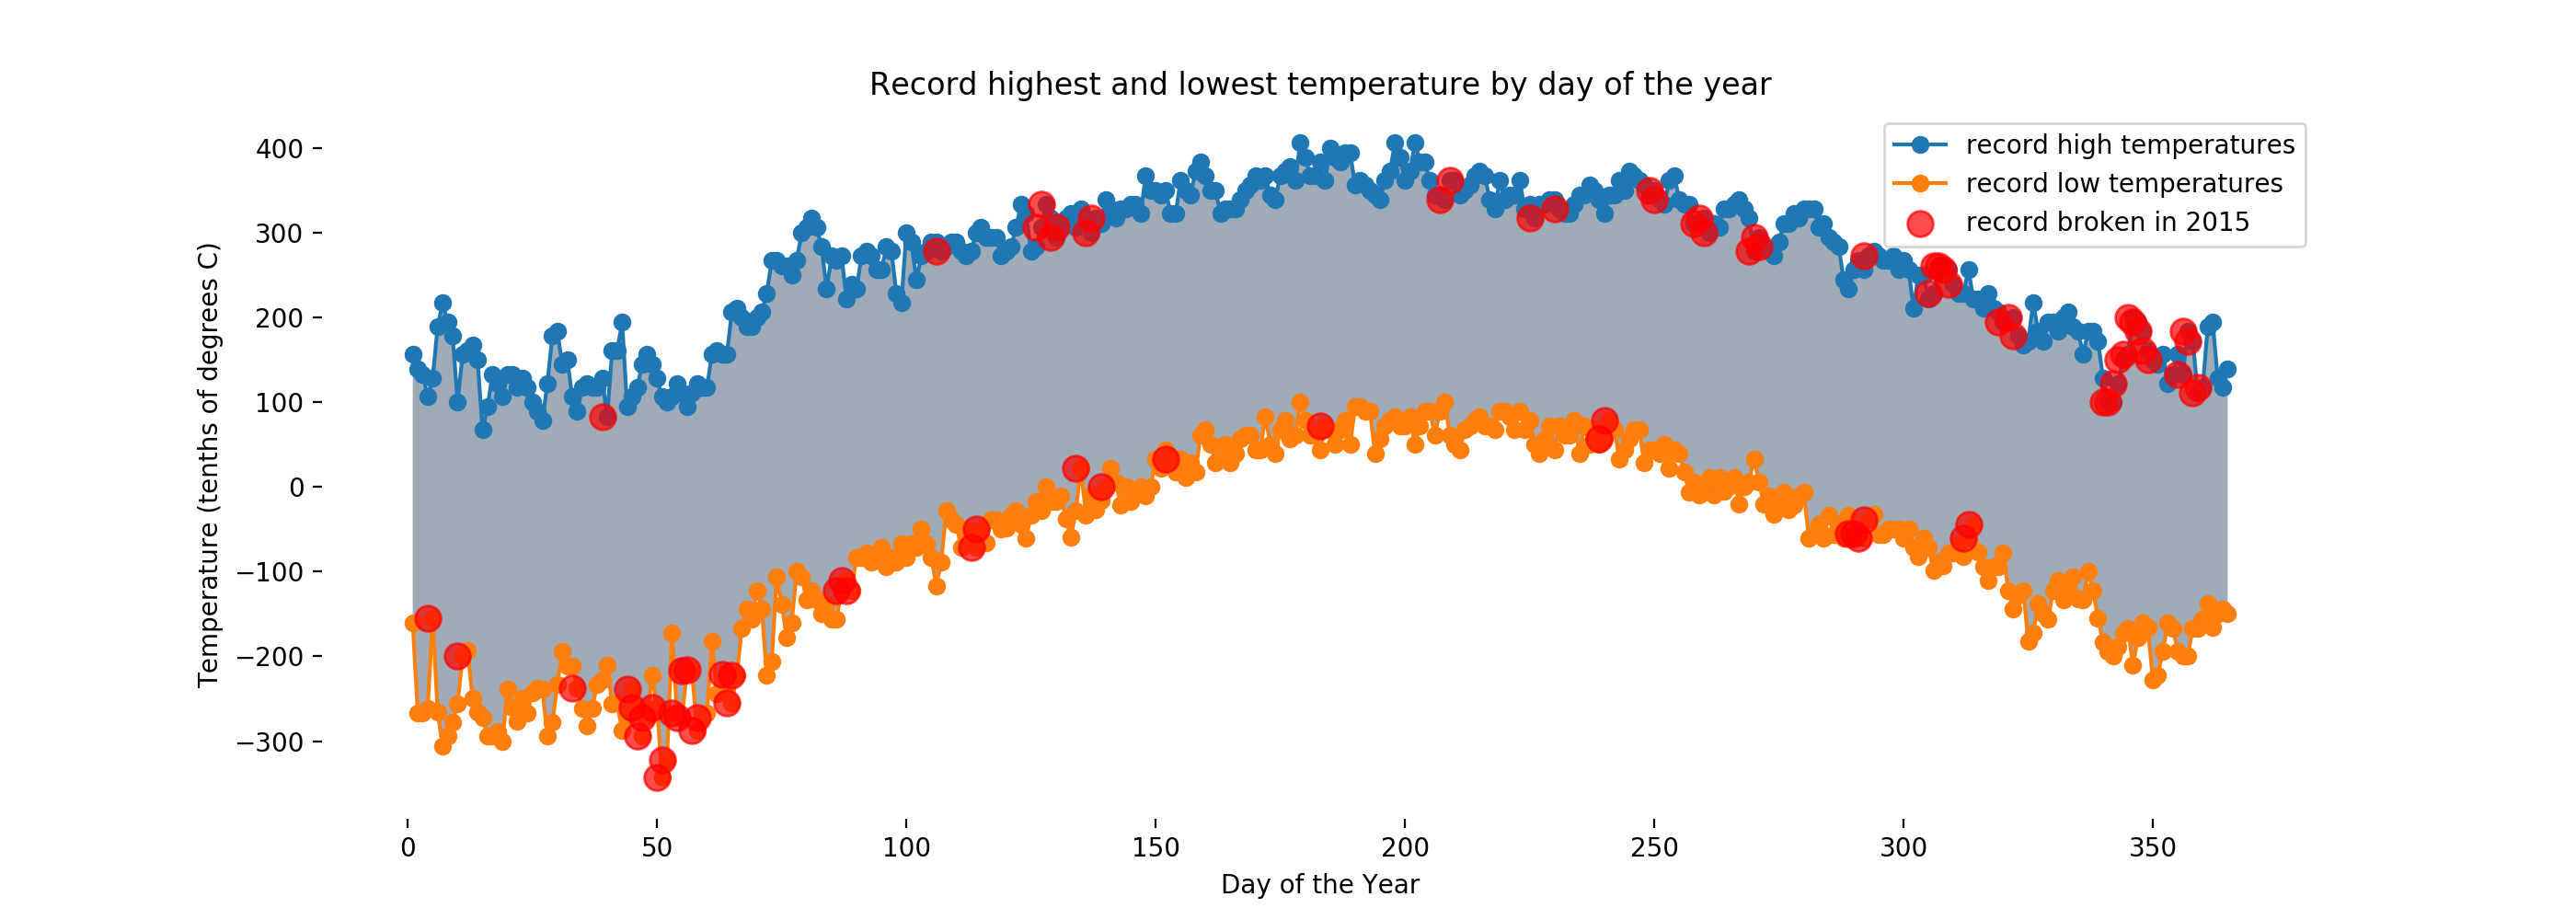

In [16]:
# Creating Figure object

plt.figure(figsize=(14,5))

ax1=plt.gca()

ax1.set_xlabel('Day of the Year')
ax1.set_ylabel('Temperature (tenths of degrees C)')
ax1.set_title('Record highest and lowest temperature by day of the year')

plt.plot(observation_dates, record_high,'-o',observation_dates,record_low,'-o',zorder=1)
ax1.legend(['Record high temp.','Record low temp.'])

plt.scatter(x,record_high2015,s=100,c='red',zorder=2,alpha=0.7)
plt.scatter(y,record_low2015,s=100,c='red',zorder=2,alpha=0.7)

ax1.legend(['record high temperatures', 'record low temperatures','record broken in 2015'])

ax1.fill_between(observation_dates, record_high, record_low, facecolor='lightslategrey', alpha=0.7)

for spine in plt.gca().spines.values():
    spine.set_visible(False)



plt.savefig('Plot.jpg')